In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
dataframe_draft = pd.read_csv("~/Downloads/data.csv")
dataframe_draft.head()

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,5.40,60,98.5,54.26,NaN,1140.0,NaN,NaN
1,Albania,Europe,3162,21.33,14.93,1.75,74,16.7,96.39,NaN,8820.0,NaN,NaN
2,Algeria,Africa,38482,27.42,7.17,2.83,73,20.0,98.99,NaN,8310.0,98.2,96.4
3,Andorra,Europe,78,15.20,22.86,NaN,82,3.2,75.49,NaN,NaN,78.4,79.4
4,Angola,Africa,20821,47.58,3.84,6.10,51,163.5,48.38,70.1,5230.0,93.1,78.2


# 1. Are there any missing values in the data set? What, if anything should be done about them if there are?

### Answer>>> Yes there are missing values, in which they can be replace with ->fillna([any-int]) or be removed using ->dropna() 

# 2. Are there any other problems with the data? If so, fix them.

In [6]:
dataframe = dataframe_draft.copy()


>> Data Inspection: 

In [7]:
print(">>> Is the data empty :",dataframe.empty)
print()
print(">>> Data shape is :", dataframe.shape)
print()
print(">>> Data Columns :", dataframe.columns)

>>> Is the data empty : False

>>> Data shape is : (194, 13)

>>> Data Columns : Index(['Country', 'Region', 'Population', 'Under15', 'Over60', 'FertilityRate',
       'LifeExpectancy', 'ChildMortality', 'CellularSubscribers',
       'LiteracyRate', 'GNI', 'PrimarySchoolEnrollmentMale',
       'PrimarySchoolEnrollmentFemale'],
      dtype='object')


### Answer >>> From the above Inspection shows that there is nothing else wrong with our Data

# 3. Identify the country with the lowest % of their population under 15 and the one with the highest.

In [8]:
print(">>> Row Index :",[dataframe.Under15.idxmin(), dataframe.Under15.idxmax()])

>>> Row Index : [85, 123]


>> The country with the lowest population under15 will be in row 85 and the highest in row 123

In [9]:
dataframe.loc[
    [dataframe.Under15.idxmin(), dataframe.Under15.idxmax()]
]

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
85,Japan,Western Pacific,127000,13.12,31.92,1.39,83,3.0,104.95,NaN,35330.0,NaN,NaN
123,Niger,Africa,17157,49.99,4.26,7.58,56,113.5,29.52,NaN,720.0,64.2,52.0


### Answer >>> Country > Japan has the lowest under15 population
### Answer >>> Country > Niger has the highest under15 population

# 4. Which region has the highest % of their population over 60?

In [10]:
dataframe.loc[
    [dataframe.Over60.idxmax()]
]

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
85,Japan,Western Pacific,127000,13.12,31.92,1.39,83,3.0,104.95,NaN,35330.0,NaN,NaN


### Answer>>> Country > Japan has the highest Over60 population

# 5. Does fertility decrease as income increases? Are there any countries that don’t seem to follow this relation?

In [15]:
fertility_vs_income = dataframe[["FertilityRate", "GNI"]]
fertility_vs_income.head()

,FertilityRate,GNI
0,5.40,1140.0
1,1.75,8820.0
2,2.83,8310.0
3,NaN,NaN
4,6.10,5230.0


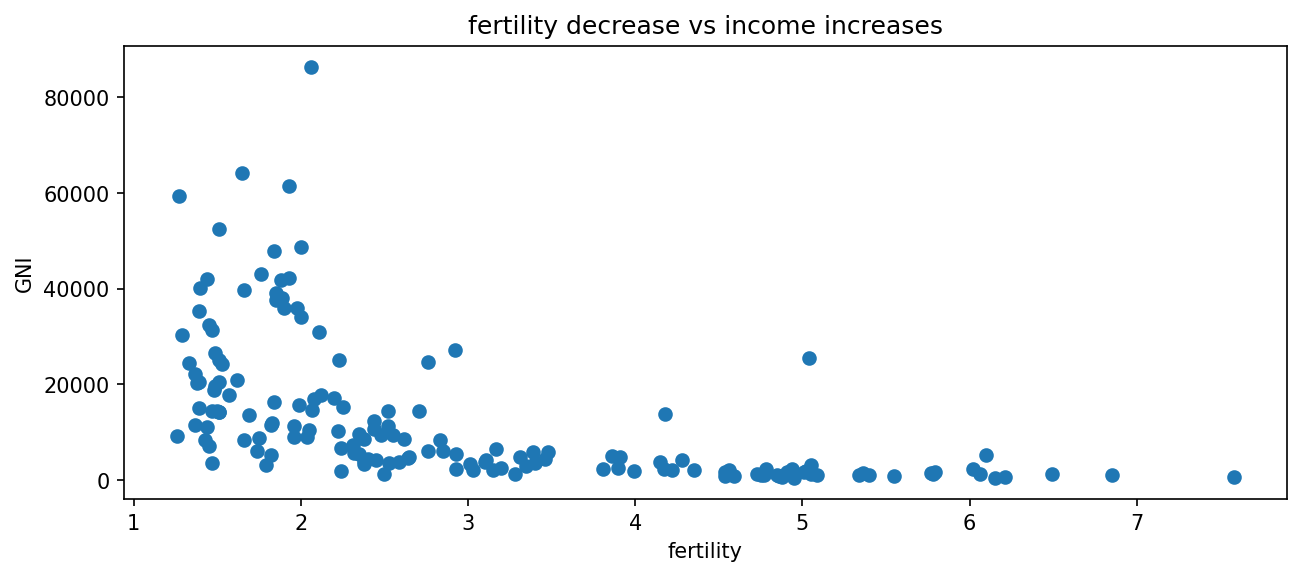

In [68]:
fig = plt.figure(figsize=(10,4), dpi=150)

fig.add_subplot()
plt.title("fertility decrease vs income increases")
plt.xlabel("fertility")
plt.ylabel("GNI")

plt.scatter(dataframe["FertilityRate"], dataframe["GNI"])

### Answer >>> From the scatter graph it conveys a correlation that shows Income decreases as population Increases 

# 6. Which regions have the lowest literacy rates?

In [17]:
dataframe.loc[
    [dataframe.LiteracyRate.idxmin()]
]

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
104,Mali,Africa,14854,47.14,4.29,6.85,51,128.0,68.32,31.1,1040.0,70.6,60.8


### Answer >>> Country = Mali, has the lowest literacy rate.

# 7. Which regions have the lowest child mortality rates?

In [19]:
dataframe.loc[
    [dataframe.ChildMortality.idxmin()]
]

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
99,Luxembourg,Europe,524,17.46,19.15,1.65,82,2.2,148.27,NaN,64260.0,93.6,95.7


### Answer >>> Country = Luxembourg, has the lowest child mortality rate.

# 8. What is the life expectancy across different regions? Create a box-and-whisker plot to investigate this. What can we conclude about life expectancy across different regions?

In [20]:
import seaborn as sns

Text(0.5, 1.0, 'life expectancy across different regions')

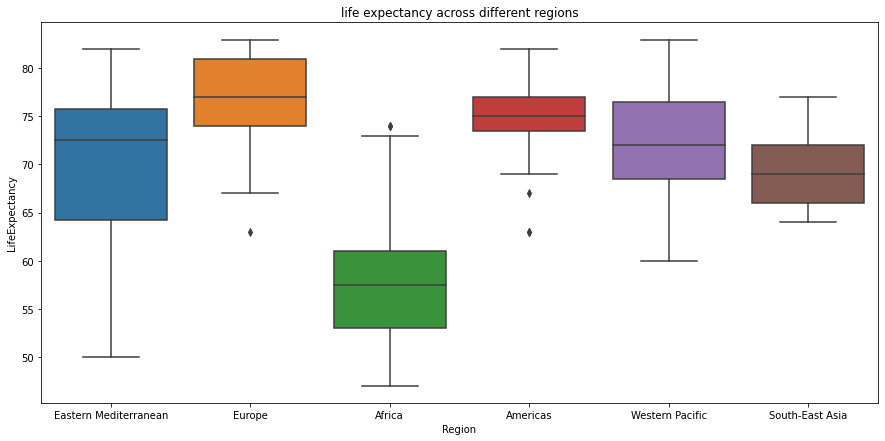

In [71]:
plt.figure(figsize=(15, 7))
box_and_whisker = sns.boxplot(x = dataframe.Region, y = dataframe.LifeExpectancy, data = dataframe).set_title("life expectancy across different regions")
box_and_whisker

# 9. How is life expectancy related to wealth across different regions? How is wealth related to fertility across different regions? Do these relationships hold for African countries?

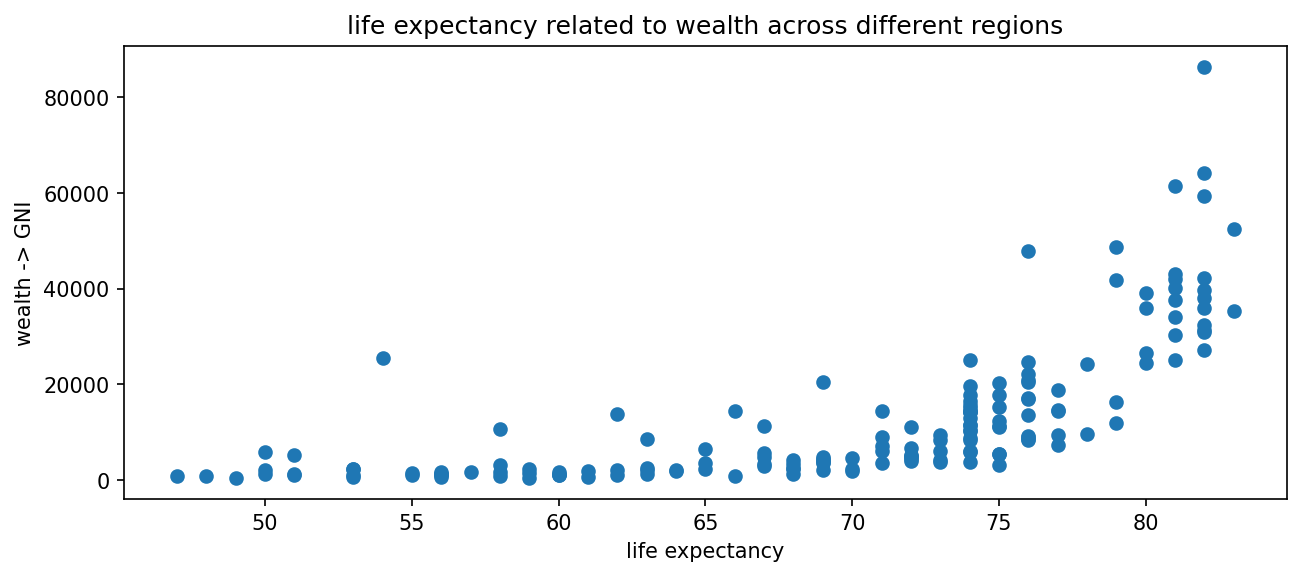

In [67]:
fig = plt.figure(figsize=(10,4), dpi=150)

fig.add_subplot()
plt.title("life expectancy related to wealth across different regions")
plt.xlabel("life expectancy")
plt.ylabel("wealth -> GNI")

plt.scatter(dataframe["LifeExpectancy"], dataframe["GNI"])

### Answer -> life expectancy vs wealth conveys a correlation of a positive value and fertility vs wealth coveys a correlation of negative value and yes the results do hold for Africa

# 10. Create appropriate graphs to visually represent the relationship between literacy and life expectancy by region, and then for African countries. What can be concluded from the graphs? How confident can we be in the relationships represented here?

<BarContainer object of 194 artists>

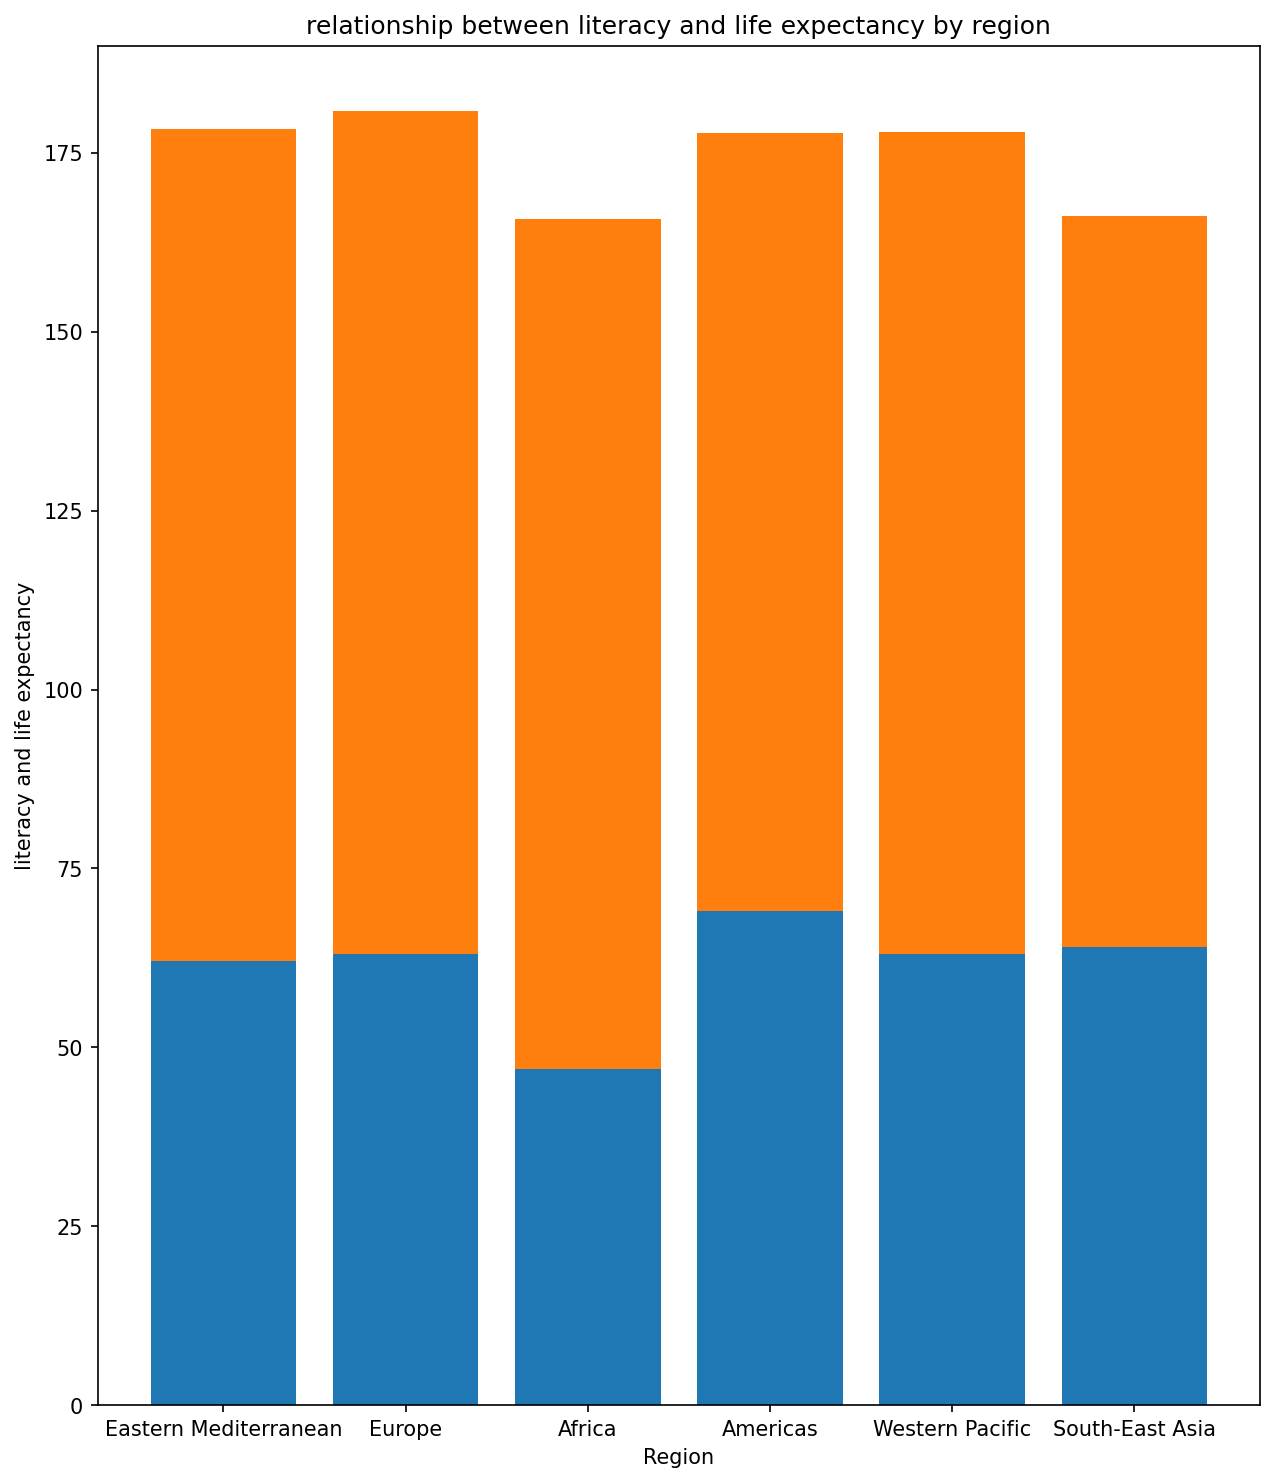

In [66]:
fig = plt.figure(figsize=(10,12), dpi=150)

fig.add_subplot()
plt.title("relationship between literacy and life expectancy by region")
plt.xlabel("Region")
plt.ylabel("literacy and life expectancy")

plt.bar(dataframe["Region"], dataframe["LifeExpectancy"])
plt.bar(dataframe["Region"], dataframe["LiteracyRate"], bottom = dataframe["LifeExpectancy"])

### Answer -> Afican countries has the lowest literacy and life expectancy.